In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [26]:
h_data = pd.read_csv("height_growth_dataset.csv")

h_Data = pd.DataFrame(h_data)
h_Data['target'] = (h_Data['Height(cm)'] > 150).astype(int)
print(h_Data)

    Age  Height(cm)  target
0     2        85.0       0
1     3        90.0       0
2     4        95.0       0
3     5       101.0       0
4     6       107.0       0
5     7       112.0       0
6     8       118.0       0
7     9       125.0       0
8    10       132.0       0
9    11       139.0       0
10   12       145.0       0
11   13       153.0       1
12   14       160.0       1
13   15       166.0       1
14   16       171.0       1
15   17       175.0       1
16   18       177.0       1


In [27]:
h_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         17 non-null     int64  
 1   Height(cm)  17 non-null     float64
 2   target      17 non-null     int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 468.0 bytes


In [28]:
x = h_Data.drop("target", axis=1)
x

,Age,Height(cm)
0,2,85.0
1,3,90.0
2,4,95.0
3,5,101.0
4,6,107.0
5,7,112.0
6,8,118.0
7,9,125.0
8,10,132.0
9,11,139.0


In [29]:
y =  h_Data["target"]
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
Name: target, dtype: int32

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train

,Age,Height(cm)
11,13,153.0
14,16,171.0
8,10,132.0
13,15,166.0
2,4,95.0
9,11,139.0
16,18,177.0
4,6,107.0
7,9,125.0
10,12,145.0


In [33]:
model = LinearRegression()
model

LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)
print(y_pred)

[-0.30986906 -0.28567111 -0.07428237  0.91257728]


In [36]:
msc = mean_squared_error(y_test, y_pred)
msc

0.04769685450247783

In [37]:
r_score = r2_score(y_test, y_pred)
r_score

0.7456167759867849

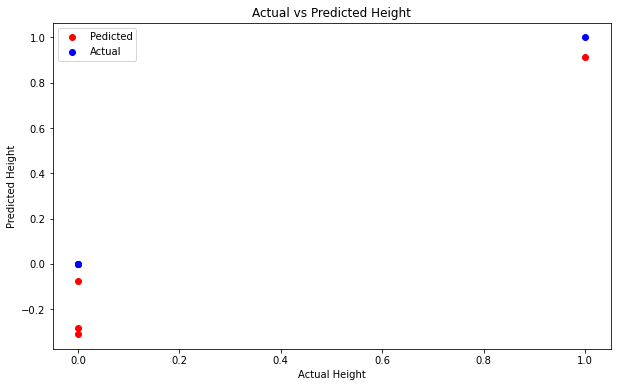

In [40]:
plt.figure(figsize=(10, 6))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.scatter(y_test, y_pred, color="red", label="Pedicted")
plt.scatter(y_test, y_test, color="blue", label="Actual")
plt.title("Actual vs Predicted Height")
plt.legend()
plt.show()